In [29]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

In [30]:
x = []
y = []

file = open('../data/5000Points.txt', 'r')
for line in file.readlines():
    words = line.split()
    x.append(int(words[0]))
    y.append(int(words[1]))
file.close()

# Blue points
x1 = x[:3000]
y1 = y[:3000]

# Red points
x2 = x[3000:]
y2 = y[3000:]


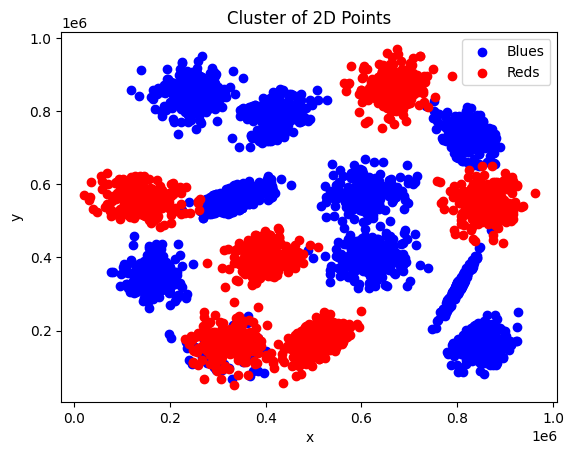

In [31]:
plt.scatter(x1, y1,label='Blues',color='b')
plt.scatter(x2, y2,label='Reds',color='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster of 2D Points')
plt.legend()
plt.show()

In [43]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.context import SparkContext as sc
import pyspark
from pyspark.sql import SparkSession


sc = sc.getOrCreate(pyspark.SparkConf().setMaster("local[*]"))
spark = SparkSession(sc)
rdd1 = sc.textFile('../data/5000Points.txt')
rdd1.first()

'    664159    550946'

In [39]:
rdd2 = rdd1.map(lambda x:x.split())
rdd2.first()

['664159', '550946']

In [40]:
rdd3 = rdd2.map(lambda x: [int(x[0]),int(x[1])])
rdd3.first()

[664159, 550946]

In [44]:
dataset = rdd3.map(lambda r: [Vectors.dense(r[0], r[1])]).toDF(['features'])
dataset.take(3)

[Row(features=DenseVector([664159.0, 550946.0])),
 Row(features=DenseVector([665845.0, 557965.0])),
 Row(features=DenseVector([597173.0, 575538.0]))]

In [45]:
# Trains a k-means model.
numOfClusters = 10
kmeans = KMeans().setK(numOfClusters).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

#predictions.take(5000)
predictions.count()
predictions.take(3)


23/03/29 15:45:41 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


[Row(features=DenseVector([664159.0, 550946.0]), prediction=3),
 Row(features=DenseVector([665845.0, 557965.0]), prediction=3),
 Row(features=DenseVector([597173.0, 575538.0]), prediction=3)]

In [46]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.7398574487298464


In [47]:
# Trains a k-means model.
silh = []
xSilh = []
clusters = 50
for cluster in range(2, clusters):
    kmeans = KMeans().setK(cluster).setSeed(1)
    model = kmeans.fit(dataset)
        # Make predictions
    predictions = model.transform(dataset)
        # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator()

    silhouette = evaluator.evaluate(predictions)
    silh.append(silhouette)
    xSilh.append(cluster)
    print(cluster, " Silhouette with squared euclidean distance = " + str(silhouette))


2  Silhouette with squared euclidean distance = 0.5404887919301126


3  Silhouette with squared euclidean distance = 0.5690800949888426


4  Silhouette with squared euclidean distance = 0.6146624912761579


5  Silhouette with squared euclidean distance = 0.5951273699007769


6  Silhouette with squared euclidean distance = 0.6568939149248035


7  Silhouette with squared euclidean distance = 0.6678628448430259


8  Silhouette with squared euclidean distance = 0.7245954253231001


9  Silhouette with squared euclidean distance = 0.7358477950111624


10  Silhouette with squared euclidean distance = 0.7398574487298464


11  Silhouette with squared euclidean distance = 0.7293271097406753


12  Silhouette with squared euclidean distance = 0.7819372667937494


13  Silhouette with squared euclidean distance = 0.8196200961282164


14  Silhouette with squared euclidean distance = 0.8389511409855817


15  Silhouette with squared euclidean distance = 0.8142905834364378


16  Silhouette with squared euclidean distance = 0.8537002694299654


17  Silhouette with squared euclidean distance = 0.8290914761711516


18  Silhouette with squared euclidean distance = 0.8020452260368176


19  Silhouette with squared euclidean distance = 0.776130246006133


20  Silhouette with squared euclidean distance = 0.7801213755322344


21  Silhouette with squared euclidean distance = 0.7503746585746592


22  Silhouette with squared euclidean distance = 0.7207795049082378


23  Silhouette with squared euclidean distance = 0.6939994362026467


24  Silhouette with squared euclidean distance = 0.661870614291233


25  Silhouette with squared euclidean distance = 0.6969308948428444


26  Silhouette with squared euclidean distance = 0.6590720024627211


27  Silhouette with squared euclidean distance = 0.5837884290772333


28  Silhouette with squared euclidean distance = 0.5848365527345738


29  Silhouette with squared euclidean distance = 0.5543841522134275


30  Silhouette with squared euclidean distance = 0.5845544503800495


31  Silhouette with squared euclidean distance = 0.5846179991720095


32  Silhouette with squared euclidean distance = 0.6023822542673568


33  Silhouette with squared euclidean distance = 0.5800449212574939


34  Silhouette with squared euclidean distance = 0.5075530768570862


35  Silhouette with squared euclidean distance = 0.5966701960066996


36  Silhouette with squared euclidean distance = 0.5638631186997034


37  Silhouette with squared euclidean distance = 0.6031322417386488


38  Silhouette with squared euclidean distance = 0.5408588702590478


39  Silhouette with squared euclidean distance = 0.5122503582632516


40  Silhouette with squared euclidean distance = 0.5186728846072097


41  Silhouette with squared euclidean distance = 0.5595744664378665


42  Silhouette with squared euclidean distance = 0.5620455750270695


43  Silhouette with squared euclidean distance = 0.544963637076292


44  Silhouette with squared euclidean distance = 0.5277840217153886


45  Silhouette with squared euclidean distance = 0.5314305667649504


46  Silhouette with squared euclidean distance = 0.5445829574455768


47  Silhouette with squared euclidean distance = 0.5252736040943077


48  Silhouette with squared euclidean distance = 0.5222963101746859


49  Silhouette with squared euclidean distance = 0.5309361721983452


In [51]:
# Shows the result.
xCenter = []
yCenter = []

centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    xCenter.append(center[0])
    yCenter.append(center[1])

Cluster Centers: 


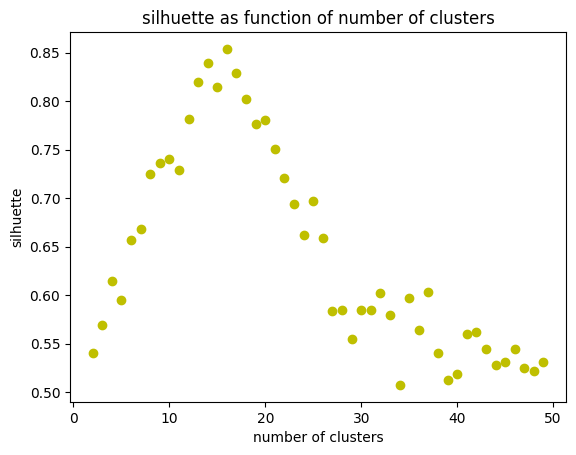

In [52]:
# Plot the silhuette
plt.scatter(xSilh, silh,label='Centers',color='y')
plt.xlabel('number of clusters')
plt.ylabel('silhuette')
plt.title('silhuette as function of number of clusters')
#plt.legend()
plt.show()

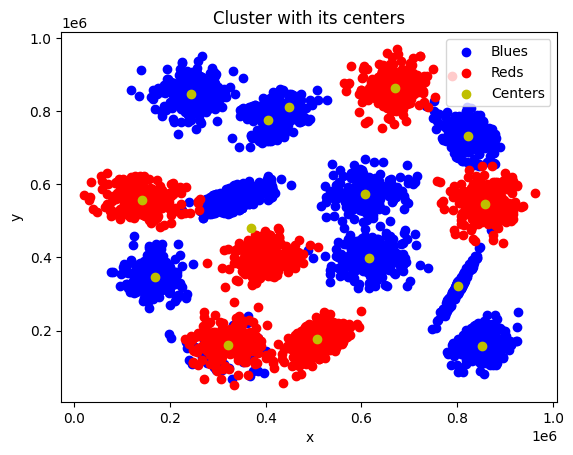

In [55]:
x = []
y = []

file = open('../data/5000Points.txt', 'r')
for line in file.readlines():
    words = line.split()
    x.append(int(words[0]))
    y.append(int(words[1]))
file.close()

x1 = x[:3000]
y1 = y[:3000]

x2 = x[3000:]
y2 = y[3000:]
plt.scatter(x1, y1,label='Blues',color='b')
plt.scatter(x2, y2,label='Reds',color='r')

numOfClusters = 15
kmeans = KMeans().setK(numOfClusters).setSeed(1)
model = kmeans.fit(dataset)

xCenter = []
yCenter = []
centers = model.clusterCenters()
for center in centers:
    xCenter.append(center[0])
    yCenter.append(center[1])

plt.scatter(xCenter, yCenter, label='Centers',color='y')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster with its centers')
plt.legend()
plt.show()

# OLD  Style

In [ ]:
rdd1 = sc.textFile("5000_points.txt")

rdd2 = rdd1.map(lambda x:x.split())
rdd3 = rdd2.map(lambda x: [int(x[0]),int(x[1])])

from pyspark.mllib.clustering import KMeans

for clusters in range(1,30):
    model = KMeans.train(rdd3, clusters)
    print (clusters, '---', model.computeCost(rdd3))




In [ ]:
for trials in range(20):                          #Try ten times to find best result
    for clusters in range(10, 20):                 #Only look in interesting range
        model = KMeans.train(rdd3, clusters)
        cost = model.computeCost(rdd3)
        centers = model.clusterCenters             #Let's grab cluster centers
        if cost<1e+13:                             #If result is good, print it out
            print (clusters, '----', cost)
            for coords in centers:
                print (int(coords[0]), '---', int(coords[1]))
            break